## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [ ]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras
# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x , flatten = True):
    x = x.astype('float32')/255.
    if flatten == True:
      x = x.reshape((len(x) , -1))
    return x

def preproc_y(y , num_classes = 10):
    y = keras.utils.to_categorical(y , num_classes = num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [18]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape , output_shape = 10 , neurons = [256 , 256 , 128 , 64]):

  print('para_shape:' , input_shape)
  # 傳入的參數input_shape本身是(a , )

  inputs = keras.layers.Input(shape = input_shape)
  
  for i , neuron in enumerate(neurons):
    if i == 0:
      x = keras.layers.Dense(units = neuron , activation = 'relu' , name = 'hidden_layer'+str(i+1))(inputs)
    else:
      x = keras.layers.Dense(units = neuron , activation = 'relu' , name = 'hidden_layer'+str(i+1))(x)
    
    
  outputs = keras.layers.Dense(units = output_shape , activation = 'softmax' , name = 'output')(x)
  
  model = keras.models.Model(inputs = [inputs] , outputs = [outputs])
  return model

model = build_mlp(x_train.shape[1:])
model.summary()

para_shape: (3072,)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 894,282
Trainable params: 894,282
Non-trainable params: 0
_________________________________

In [19]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 20
BATCH_SIZE = 256

In [20]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [21]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 60us/step - loss: 1.9330 - accuracy: 0.2985 - val_loss: 1.7620 - val_accuracy: 0.3636
Epoch 2/20
50000/50000 [==============================] - 1s 24us/step - loss: 1.7108 - accuracy: 0.3851 - val_loss: 1.6580 - val_accuracy: 0.4110
Epoch 3/20
50000/50000 [==============================] - 1s 24us/step - loss: 1.6174 - accuracy: 0.4211 - val_loss: 1.5692 - val_accuracy: 0.4410
Epoch 4/20
50000/50000 [==============================] - 1s 25us/step - loss: 1.5525 - accuracy: 0.4458 - val_loss: 1.6300 - val_accuracy: 0.4182
Epoch 5/20
50000/50000 [==============================] - 1s 24us/step - loss: 1.5151 - accuracy: 0.4575 - val_loss: 1.5069 - val_accuracy: 0.4635
Epoch 6/20
50000/50000 [==============================] - 1s 25us/step - loss: 1.4661 - accuracy: 0.4781 - val_loss: 1.4889 - val_accuracy: 0.4688
Epoch 7/20
50000/50000 [==============================] - 1s 24us/st

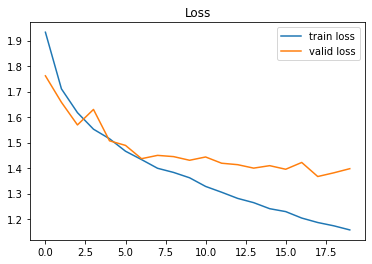

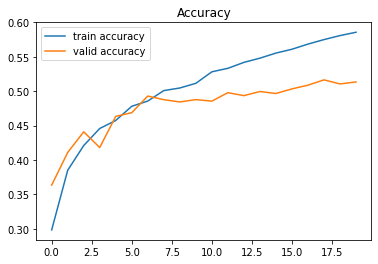

In [23]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()